**CODERS CREW DATA SCIENCE PROJECT**


# **Analiza rynku pracy IT**

## na podstawie danych z portalu Stackoverflow


> Celem badania jest poznanie sytuacji zawodowej pracowników w branży IT aktywnych na rynku pracy w Polsce i za granicą według danych z platformy StackOverflow.


> Badanie skupia się na poznaniu aktualnej sytuacji zawodowej oraz doświadczeniu, oczekiwaniach i planach zawodowych. W poniższym opracowaniu skupiono się głównie na rynku w Polsce, badając:



> 1.   Liczbę kobiet i mężczyzn pracujących w branży IT, w tym zajmowane środowiska i procentowy udział deklarowanych płci w środowisku programistów w Polsce.
2.   Średnie wykształcenie programisty pracującego w małej i dużej firmie.
3. Wielkość firmy a zarobki na podobnym stanowisku.
4. Liczbę aktywnie poszukujących nowej pracy.
5. Sytuację studentów na rynku pracy - częstość zatrudnienia studentów w zależności od wielkości firmy oraz sprawdzenie, czy uzyskanie tytułu magistra zwiększa szanse na znalezienie (lepszej) pracy w porównaniu do tytułu licencjata/inżyniera.
6. Poziom satysfakcji związanej z obejmowanym stanowiskiem w zależności od czasu programowania/wykonywania zawodu.
7. Zestawienie obecnie używanych języków programowania, baz danych, platform i frameworków z najlepiej rokującymi w kolejnych latach technologiami.
8. Co wpływa na podjęcie decyzji o zmianie pracy - czym można przekonać potencjalnego pracownika (assessjob, benefits).






#### Wykonanie: grupa nr 5




**Importy**

**Załadowanie danych z bazy danych pochodzących z badania ankietowego użytkowników Stack Overflow w 2018 r.**

In [0]:
import numpy as np
import pandas as pd
import plotly.plotly as py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from google.colab import files
uploades = files.upload()

Saving survey_results_public.csv to survey_results_public (1).csv


In [0]:
df = pd.read_csv('survey_results_public.csv', sep=',', low_memory=False)

**Dane dotyczące pytań z ankiety**

In [0]:
 schema =  pd.read_csv('survey_results_schema.csv', low_memory=False)
 pd.options.display.max_colwidth = 300
 schema

**Dane z ankiety**

In [0]:
pd.options.display.max_colwidth = 300
df

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, physics)","10,000 or more employees",Database administrator;DevOps specialist;Full-stack developer;System administrator,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or software engineering",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering","10,000 or more employees",Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",10 to 19 employees,Back-end developer;Database administrator;Front-end developer;Full-stack developer,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering","10,000 or more employees",Back-end developer;Front-end developer;Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
7,10,Yes,Yes,Nigeria,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",10 to 19 employees,Designer;Front-end developer;QA or test developer,...,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning a degree,"Fine arts or performing arts (ex. graphic design, music, studio art)",100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst;Database administrator;DevOps specialist;Engineering manager;Full-stack developer;System administrator",...,I don't typically exercis

**Pierwsze 5 kolumn bazy danych z ankiety**

In [0]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, physics)","10,000 or more employees",Database administrator;DevOps specialist;Full-stack developer;System administrator,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or software engineering",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering","10,000 or more employees",Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


**Nazwy kolumn w bazie**

In [0]:
df.columns.values

array(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student',
       'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus',
       'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3',
       'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
       'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1',
       'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5',
       'JobEmailPriorities1', 'JobEmailPriorities2',
       'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6',
       'JobE

## Dane dla Polski

In [0]:
dfPoland = data.loc[data['Country'] == 'Poland']
dfPoland

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
30,47,No,No,Poland,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Engineering manager,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,25 - 34 years old,No,NaN,The survey was an appropriate length,Somewhat easy
34,53,Yes,No,Poland,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...","10,000 or more employees",Designer,...,3 - 4 times per week,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Very easy
90,134,No,No,Poland,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Desktop or enterprise appli...,...,3 - 4 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
119,175,No,No,Poland,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,Front-end developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,195,Yes,Yes,Poland,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Data or business analyst;Da...,...,3 - 4 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat easy
232,348,Yes,No,Poland,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,361,Yes,No,Poland,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...","5,000 to 9,999 employees",Back-end developer,...,1 - 2 times per week,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
573,800,Yes,Yes,Poland,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",100 to 499 employees,Back-end developer;Educator or academic resear...,...,Daily or almost every day,Male,Straight or heterosexual,"Professional degree (JD, MD, etc.)",White or of European descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
596,831,No,No,Poland,"Yes, full-time",Employed full-time,"Secondary school (e.g. American high school, G...",NaN,20 to 99 employees,QA or test developer;Student,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,845,Yes,No,Poland,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Database administrator;Full...,...,3 - 4 times per week,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,25 - 34 years old,No,NaN,The survey was an appropriate length,Neither easy nor difficult


*Liczby kobiet i mężczyzn pracujących w IT w poszczególnych krajach - pierwszych 20 pozycji*

In [0]:
dfGender = df.groupby('Country')['Gender'].value_counts()
dfGender_FM = dfGender.unstack().fillna(0)[['Male', 'Female']]
dfGender_FM = pd.DataFrame(dfGender_FM)
dfGender_FMloc = dfGender_FM.sort_values(by = 'Female', ascending = False).head(20)
dfGender_FMloc.reset_index()

Gender,Country,Male,Female
0,United States,13913.0,1288.0
1,India,6213.0,440.0
2,United Kingdom,4260.0,256.0
3,Canada,2201.0,208.0
4,Germany,4204.0,193.0
5,Russian Federation,1632.0,95.0
6,Australia,1389.0,85.0
7,France,1629.0,83.0
8,Poland,1310.0,73.0
9,Netherlands,1211.0,66.0


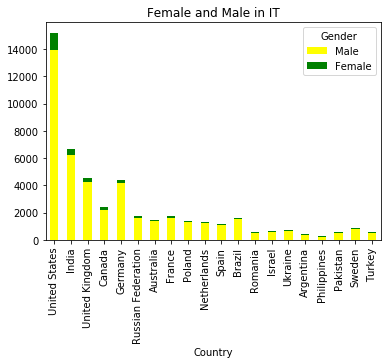

In [0]:
dfGender_FMloc.plot.bar(stacked = True, color = ['yellow', 'green'], title = 'Female and Male in IT')

# **Statystyki dla Polski:**



##    1.   Liczba kobiet i mężczyzn pracujących w branży IT.


*Udział procentowy deklarowanych płci w środowisku programistów w Polsce*

In [0]:
dfPolandInPer = pd.DataFrame(dfPoland.Gender.value_counts(normalize = True))
dfPolandInPer['Gender'] = dfPolandInPer['Gender']*100
dfPolandInPer.columns = ['Gender in %']
dfPolandInPer

,Gender in %
Male,94.244604
Female,5.251799
"Non-binary, genderqueer, or gender non-conforming",0.143885
"Female;Non-binary, genderqueer, or gender non-conforming",0.071942
"Male;Transgender;Non-binary, genderqueer, or gender non-conforming",0.071942
Male;Transgender,0.071942
"Male;Non-binary, genderqueer, or gender non-conforming",0.071942
Transgender,0.071942


*Kobiety i mężczyźni w IT ilościowo w Polsce*

In [0]:
dfPGender = dfPoland.groupby('Gender')['Gender'].count().sort_values(ascending = False)
pd.DataFrame(dfPGender).iloc[0:2]

,Gender
Gender,
Male,1310
Female,73


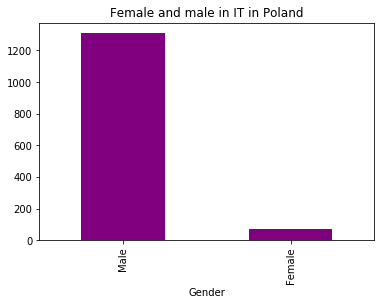

In [0]:
dfPGender.iloc[0:2].plot(kind = 'bar', title = 'Female and male in IT in Poland', color = 'purple')

*Jakie stanowiska zajmują kobiety i mężczyźni na rynku IT w Polsce*

In [0]:
groupedByGender = dfPoland.groupby(by = ['Gender','DevType'])
pd.DataFrame(dfPoland.groupby(['Gender','DevType'])['DevType'].count().sort_values(ascending=False)).query('Gender == ["Male", "Female"]')

DevType
Gender DevType                                                    
Male   Back-end developer                                      137
       Back-end developer;Front-end developer;Full-sta...       75
       Full-stack developer                                     65
       Back-end developer;Full-stack developer                  57
       Mobile developer                                         53
       Front-end developer                                      31
       Student                                                  25
       Back-end developer;Desktop or enterprise applic...       22
       Back-end developer;Student                               17
       Back-end developer;Desktop or enterprise applic...       15
       QA or test developer                                     15
       Back-end developer;Front-end developer;Full-sta...       14
       Embedded applications or devices developer               14
       Back-end developer;DevOps specialist;Front-end ...       13
       Back-end developer;Data scientist or machine le...       13
       Front-end developer;Full-stack developer                 13
       Back-end developer;Desktop or enterprise applic...       12
       Back-end developer;DevOps specialist;Full-stack...       12
       Back-end developer;DevOps specialist                     12
       Desktop or enterprise applications developer             11
       Data scientist or machine learning specialist             9
       Desktop or enterprise applications developer;Em...        8
       Back-end developer;Front-end developer                    8
       Back-end developer;Front-end developer;Full-sta...        7
       Back-end developer;Embedded applications or dev...        7
       Back-end developer;Full-stack developer;Student           7
       Back-end developer;Desktop or enterprise applic...        7
Female Front-end developer                                       6
Male   Front-end developer;Student                               6
       Back-end developer;Designer;Front-end developer...        6
...                                                            ...
       Data or business analyst;Desktop or enterprise ...        1
       Data or business analyst;Desktop or enterprise ...        1
       Back-end developer;Game or graphics developer;Q...        1
       Back-end developer;Game or graphics developer             1
       Back-end developer;Full-stack developer;System ...        1
       Back-end developer;Front-end developer;Game or ...        1
       Back-end developer;DevOps specialist;QA or test...        1
       Back-end developer;DevOps specialist;Student              1
       Back-end developer;Educator or academic researc...        1
       Back-end developer;Educator or academic researc...        1
       Back-end developer;Educator or academic researc...        1
       Back-end developer;Educator or academic researc...        1
       Back-end developer;Educator or academic researc...        1
       Back-end developer;Educator or academic researc...        1
       Back-end developer;Educator or academic researc...        1
       Back-end developer;Embedded applications or dev...        1
       Back-end developer;Embedded applications or dev...        1
       Back-end developer;Embedded applications or dev...        1
       Back-end developer;Embedded applications or dev...        1
       Back-end developer;Embedded applications or dev...        1
       Back-end developer;Engineering manager;Front-en...        1
       Back-end developer;Engineering manager;Front-en...        1
       Back-end developer;Engineering manager;Full-sta...        1
       Back-end developer;Engineering manager;Game or ...        1
       Back-end developer;Engineering manager;Mobile d...        1
       Back-end developer;Engineering manager;Mobile d...        1
       Back-end developer;Front-end developer;Full-sta...        1
       Back-end developer;Front-end dev

*Z danych wynika, że udział kobiet w rynku IT jest niewielki. Nawet w krajach, gdzie jest dużo kobiet na rynku IT (jak USA czy Indie), w stosunku do ilości mężczyzn na rynku IT stanowią one niewielką część. Podobną prawidłowość potwierdza Polska, która pod kątem ilości kobiet na rynku IT jest w pierwszej dziesiątce, jednak w stosunku do ilości programistów - jest to niewielka część rynku programistów (około 5 %). Należałoby porównać wcześniejsze dane, jaka jest tendencja udziału kobiet w rynku IT na świecie i w Polsce*



### 2.   Średnie wykształcenie programisty pracującego w małej i dużej firmie




In [0]:
dfPol_Educ = pd.pivot_table(dfPoland[['FormalEducation', 'CompanySize']], index = ['FormalEducation'], columns = ['CompanySize'], aggfunc = [len], fill_value = 0)
dfPol_Educ = dfPol_Educ[[('len', 'Fewer than 10 employees'), ('len', '10 to 19 employees'), ('len', '20 to 99 employees'),
       ('len', '100 to 499 employees'), ('len', '500 to 999 employees'), ('len', '1,000 to 4,999 employees'),  ('len', '10,000 or more employees'),
       ('len', '5,000 to 9,999 employees')]]
dfPol_Educ.reset_index(drop = True)
#dfPol_Educ1 = dfPol_Educ.reindex([0,4,6,3,1,8,7,5,2], copy = True)
dfPol_Educ1 = dfPol_Educ.reindex(['Other doctoral degree (Ph.D, Ed.D., etc.)', 'Master’s degree (MA, MS, M.Eng., MBA, etc.)','Professional degree (JD, MD, etc.)', 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
      'Some college/university study without earning a degree', 'Associate degree','Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)','Primary/elementary school', 
       'I never completed any formal education',], copy = True)
dfPol_Educ1

len  \
CompanySize                                        Fewer than 10 employees   
FormalEducation                                                              
Other doctoral degree (Ph.D, Ed.D., etc.)                                0   
Master’s degree (MA, MS, M.Eng., MBA, etc.)                             20   
Professional degree (JD, MD, etc.)                                       0   
Bachelor’s degree (BA, BS, B.Eng., etc.)                                24   
Some college/university study without earning a...                      18   
Associate degree                                                         3   
Secondary school (e.g. American high school, Ge...                      14   
Primary/elementary school                                                0   
I never completed any formal education                                   0   

                                                                       \
CompanySize                                        10 to 19 employees   
FormalEducation                                                         
Other doctoral degree (Ph.D, Ed.D., etc.)                           3   
Master’s degree (MA, MS, M.Eng., MBA, etc.)                        62   
Professional degree (JD, MD, etc.)                                  1   
Bachelor’s degree (BA, BS, B.Eng., etc.)                           42   
Some college/university study without earning a...                 16   
Associate degree                                                    1   
Secondary school (e.g. American high school, Ge...                 18   
Primary/elementary school                                           0   
I never completed any formal education                              0   

                                                                       \
CompanySize                                        20 to 99 employees   
FormalEducation                                                         
Other doctoral degree (Ph.D, Ed.D., etc.)                           5   
Master’s degree (MA, MS, M.Eng., MBA, etc.)                       126   
Professional degree (JD, MD, etc.)                                  3   
Bachelor’s degree (BA, BS, B.Eng., etc.)                          120   
Some college/university study without earning a...                 58   
Associate degree                                                    2   
Secondary school (e.g. American high school, Ge...                 32   
Primary/elementary school                                           4   
I never completed any formal education                              1   

                                                                         \
CompanySize                                        100 to 499 employees   
FormalEducation                                                           
Other doctoral degree (Ph.D, Ed.D., etc.)                             1   
Master’s degree (MA, MS, M.Eng., MBA, etc.)                         132   
Professional degree (JD, MD, etc.)                                    0   
Bachelor’s degree (BA, BS, B.Eng., etc.)                             92   
Some college/university study without earning a...                   39   
Associate degree                                                      5   
Secondary school (e.g. American high school, Ge...                   29   
Primary/elementary school                                             1   
I never completed any formal education                                0   

                                                                         \
CompanySize                                        500 to 999 employees   
FormalEducation                                                           
Other doctoral degree (Ph.D, Ed.D., etc.)                             1   
Master’s degree (MA, MS, M.Eng., MBA, etc.)                          45   
Professional degree (JD, MD, etc.)                                    2   
Bachelor’s degree (BA, BS, B.

*Z danych wynika, że większość programistów ma wyższe wykształcenie:  magisterskie albo jest to licencjat. Dużo mniej jest osób z wykształceniem średnim. W jednostkowych przypadkach są to osoby, kóre mają stopnie doktorskie. Osoby z wyższym wykształceniem pracują w większości w dużych firmach, co wiązać się może z wymaganiami kwalifikacyjnymi podczas rekrutacji.*

## 3.   Wielkość firmy a zarobki na podobnym stanowisku




*Zestawienie stanowisk IT i zarobków w Polsce - średnia, max i min*

In [0]:
dfPol_Sal = dfPoland[['DevType', 'CompanySize', 'Salary']].groupby(['CompanySize', 'DevType']).agg({'Salary': ['mean', 'min', 'max']}, fill_values = 0)
dfPol_Sal

Salary  \
                                                                                    mean   
CompanySize              DevType                                                           
1,000 to 4,999 employees Back-end developer                                   16660.1875   
                         Back-end developer;Data or business analyst          84000.0000   
                         Back-end developer;Data or business analyst;Dat...    6500.0000   
                         Back-end developer;Data or business analyst;Des...    4200.0000   
                         Back-end developer;Data or business analyst;Des...    8000.0000   
                         Back-end developer;Data or business analyst;Des...   19000.0000   
                         Back-end developer;Data or business analyst;Fro...          NaN   
                         Back-end developer;Data scientist or machine le...  270000.0000   
                         Back-end developer;Data scientist or machine le...          NaN   
                         Back-end developer;Data scientist or machine le...          NaN   
                         Back-end developer;Data scientist or machine le...    3550.0000   
                         Back-end developer;Database administrator;Desig...    8800.0000   
                         Back-end developer;Database administrator;Desig...   10000.0000   
                         Back-end developer;Database administrator;Desig...   72000.0000   
                         Back-end developer;Database administrator;Desig...          NaN   
                         Back-end developer;Database administrator;DevOp...   12000.0000   
                         Back-end developer;Database administrator;DevOp...          NaN   
                         Back-end developer;Database administrator;Front...   13700.0000   
                         Back-end developer;Database administrator;Full-...     900.0000   
                         Back-end developer;Designer;Desktop or enterpri...    7700.0000   
                         Back-end developer;Designer;DevOps specialist;E...    6500.0000   
                         Back-end developer;Designer;Front-end developer...    7200.0000   
                         Back-end developer;Designer;Full-stack developer     19000.0000   
                         Back-end developer;Desktop or enterprise applic...   10750.0000   
                         Back-end developer;Desktop or enterprise applic...          NaN   
                         Back-end developer;Desktop or enterprise applic...          NaN   
                         Back-end developer;Desktop or enterprise applic...    8300.0000   
                         Back-end developer;Desktop or enterprise applic...          NaN   
                         Back-end developer;Desktop or enterprise applic...   13000.0000   
                         Back-end developer;DevOps specialist;Educator o...   10000.0000   
...                                                                                  ...   
Fewer than 10 employees  Back-end developer;Embedded applications or dev...    6000.0000   
                         Back-end developer;Front-end developer                      NaN   
                         Back-end developer;Front-end developer;Full-sta...    6950.0000   
                         Back-end developer;Front-end developer;Full-sta...          NaN   
                         Back-end developer;Front-end developer;Full-sta...          NaN   
                         Back-end developer;Front-end developer;Full-sta...    7000.0000   
                         Back-end developer;Front-end developer;Full-sta...    4500.0000   
                         Back-end developer;Front-end developer;Full-sta...    6000.0000   
                         Back-end developer;Front-end developer;Mobile d...    6000.0000   
                         Back-end developer;Front-end developer;Student        4647.0000   
                         Back-end 

*Zarobki programistów w Polsce w zależności od stażu pracy - w dolarach*

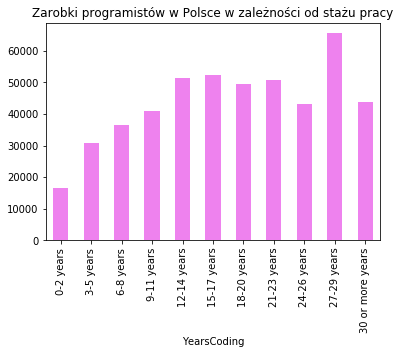

In [0]:
df['ConvertedSalary'] = pd.to_numeric(df['ConvertedSalary'])
df_Sal_Years = dfPoland[np.isfinite(dfPoland['ConvertedSalary'])].groupby(['YearsCoding'])['ConvertedSalary'].mean()
df_Sal_Years = df_Sal_Years.reindex(index=['0-2 years','3-5 years',  '6-8 years', '9-11 years', '12-14 years',
    '15-17 years', '18-20 years', '21-23 years', '24-26 years', '27-29 years', '30 or more years'])
df_Sal_Years.plot(kind="bar", color = ['violet'], title = "Zarobki programistów w Polsce w zależności od stażu pracy")

*Zarobki programistów w Polsce w zależności od wieku ankietowanych w Polsce - w dolarach*

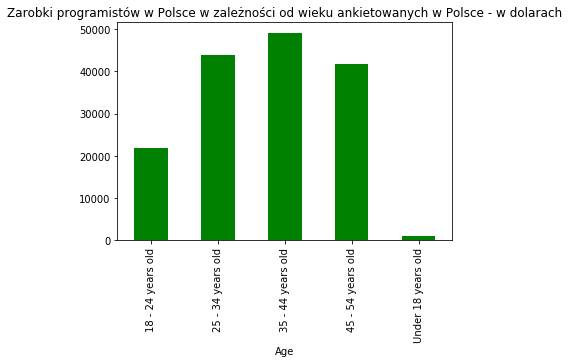

In [0]:
df_Sal_Age = dfPoland[np.isfinite(dfPoland['ConvertedSalary'])].groupby(['Age'])['ConvertedSalary'].mean()
'''df_Sal_Age = df_Sal_Age.reindex(index=['0-2 years','3-5 years',  '6-8 years', '9-11 years', '12-14 years',
    '15-17 years', '18-20 years', '21-23 years', '24-26 years', '27-29 years', '30 or more years'])'''
df_Sal_Age.plot(kind="bar", color = ['green'], title = 'Zarobki programistów w Polsce w zależności od wieku ankietowanych w Polsce - w dolarach')

*Z danych na temat zarobków programistów w Polsce wynika, że są one uzależnione od doświadczenia w programowaniu, a co za tym idzie od wieku ankietowanych. Największe zarobki osiąga się po  12 latach kodowania,  a staż pracy powyżej 27 lat to wynagrodzenie nawet 4 krotnie przewyższające wynagrodzenie osób początkujących w zawodzie. Podobne dane są dla wieku, osoby w wieku 35-44 lat osiągają największe zarobki, najprawdopodobniej dzięki znacznemu doświadczeniu w zawodzie.*

## 4.   Liczba aktywnie poszukujących nowej pracy



In [0]:
dfPolSearch = dfPoland.groupby('JobSearchStatus')['JobSearchStatus'].count().sort_values(ascending = False)
pd.DataFrame(dfPolSearch)


,JobSearchStatus
JobSearchStatus,
"I’m not actively looking, but I am open to new opportunities",1113
I am not interested in new job opportunities,411
I am actively looking for a job,167


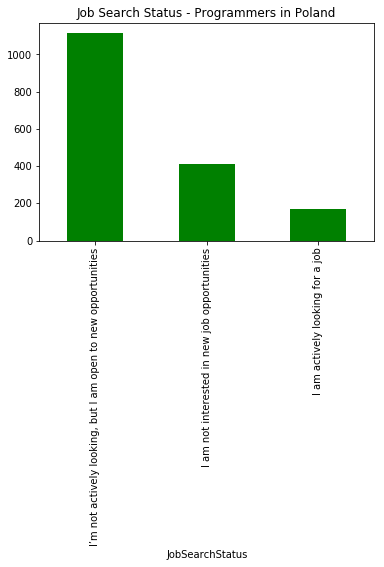

In [0]:
dfPolSearch.plot(kind = 'bar', color = ['green'], title = 'Job Search Status - Programmers in Poland')

*Większość programistów nie szuka pracy, ale jest otwarta na nowe możliwości. Wynika to z istniejącego rynku pracownika w przypadku programistów, co pozwala doświadczonym osobom wybierać firmy, w których chcą pracować i opuszczać miejsca pracy, które nie tworzą sprzyjających warunków do pracy i rozwoju. Programiści zdając sobie sprawę z sytuacji na rynku, wiedzą że praca ich znajdzie, nie muszą jej szukać.*



## 5.   Sytuacja studentów na rynku pracy 



###5a. Częstość zatrudnienia studentów w zależności od wielkości firmy.

In [0]:
data_pl_CompanySize = pd.pivot_table(dfPoland[['CompanySize', 'Student']], index = ['CompanySize'], columns = ['Student'], aggfunc = [len], fill_value = 0)
data_pl_CompanySize.sort_values(by=data_pl_CompanySize.columns.values[1], ascending = False)
data_pl_CompanySize = data_pl_CompanySize[[('len', 'No'), ('len', 'Yes, part-time'), ('len', 'Yes, full-time')]]
data_pl_CompanySize = data_pl_CompanySize.reindex(['Fewer than 10 employees', '20 to 99 employees', '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees'])
data_pl_CompanySize 

len                              
Student                    No Yes, part-time Yes, full-time
CompanySize                                                
Fewer than 10 employees    58              7             13
20 to 99 employees        240             41             69
100 to 499 employees      209             40             45
500 to 999 employees       56              9             15
1,000 to 4,999 employees  112              7             36
5,000 to 9,999 employees   56              5             15
10,000 or more employees  162             21             36

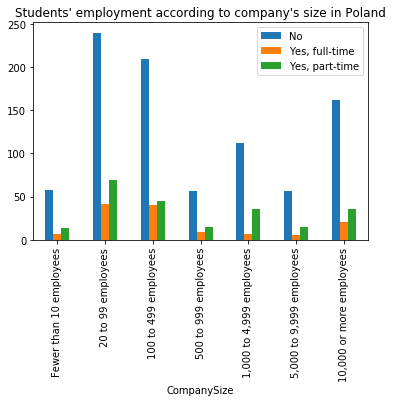

In [0]:
data_pl_CompanySize.plot(kind = 'bar', title = "Students' employment according to company's size in Poland")
plt.legend(dfPoland['Student'].unique())

*Z wykresu wynika, że w firmach IT pracuje więcej studentów studiujących zaocznie niż dziennie. Różnica ta najbardziej wyrównuje się w średnich firmach, zatrudniających od 100 do  499 osób, które stoją na drugim miejscu jeśli chodzi o sumaryczną liczbą zatrudnionych studentów.*

### 5b. Czy uzyskanie tytułu magistra zwiększa szanse na znalezienie (lepszej) pracy w porównaniu do tytułu licencjata/inżyniera?

In [0]:
dfPol_Empl = pd.pivot_table(dfPoland[['FormalEducation', 'Employment']], index = ['FormalEducation'], columns = ['Employment'], aggfunc = len, fill_value = 0)
#dfPol_Empl.sort_values(by = dfPol_Empl.columns.values[0], ascending = False)
dfPol_Empl1 = dfPol_Empl.reindex(['Other doctoral degree (Ph.D, Ed.D., etc.)', 'Master’s degree (MA, MS, M.Eng., MBA, etc.)','Professional degree (JD, MD, etc.)', 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
      'Some college/university study without earning a degree', 'Associate degree','Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)','Primary/elementary school', 
       'I never completed any formal education',], copy = True)
dfPol_Empl1

Employment,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work"
FormalEducation,,,,,
"Other doctoral degree (Ph.D, Ed.D., etc.)",16,1,5,0,0
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",608,17,149,4,2
"Professional degree (JD, MD, etc.)",9,1,1,0,0
"Bachelor’s degree (BA, BS, B.Eng., etc.)",358,77,75,9,19
Some college/university study without earning a degree,169,27,55,10,16
Associate degree,13,3,2,0,1
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",86,41,23,41,33
Primary/elementary school,4,1,2,12,1
I never completed any formal education,3,0,1,1,0


*Wyższe wykształcenie zwiększa szansę na znalezienie pracy na pełen etat. Potwierdzają to też dane dot. wykształcenia programistów zatrudnionych w różnej wielkości firmach.*

Text(0.5, 1.0, 'Education vs. employment')

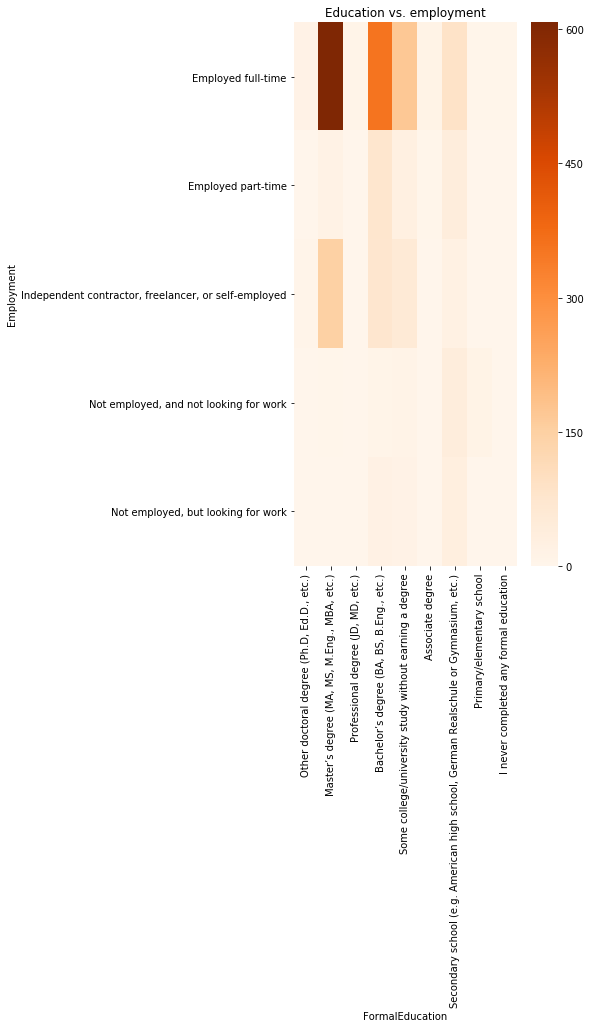

In [0]:
plt.figure(figsize=(5, 10))
ax = plt.axes()
sns.heatmap(dfPol_Empl1.T, cmap = 'Oranges', ax =ax)
ax.set_title("Education vs. employment")



## 6.  Poziom satysfakcji związanej z obejmowanym stanowiskiem w zależności od czasu programowania/wykonywania zawodu.




In [0]:
dfPol_Sat = pd.pivot_table(dfPoland[['JobSatisfaction', 'YearsCoding']], index = ['YearsCoding'], columns = ['JobSatisfaction'], aggfunc = [len], fill_value = 0)
dfPol_Sat.sort_values(by = dfPol_Sat.columns.values[1], ascending = False)
dfPol_Sat = dfPol_Sat[[('len', 'Extremely satisfied'),('len', 'Moderately satisfied'),('len', 'Slightly satisfied'),
       ('len', 'Neither satisfied nor dissatisfied'),('len', 'Slightly dissatisfied'),('len', 'Moderately dissatisfied'),
         ('len', 'Extremely dissatisfied')]]
dfPol_Sat1 = dfPol_Sat.reindex(['0-2 years',  '3-5 years', '6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', '21-23 years',
       '24-26 years', '27-29 years', '30 or more years'])
dfPol_Sat1

len                                          \
JobSatisfaction  Extremely satisfied Moderately satisfied Slightly satisfied   
YearsCoding                                                                    
0-2 years                         17                   44                 20   
3-5 years                         51                  129                 70   
6-8 years                         39                  133                 56   
9-11 years                        37                  126                 50   
12-14 years                       23                   78                 29   
15-17 years                       15                   58                 21   
18-20 years                       11                   18                  9   
21-23 years                        5                   11                  7   
24-26 years                        3                   14                  2   
27-29 years                        1                    5                  2   
30 or more years                   1                    6                  1   

                                                                           \
JobSatisfaction  Neither satisfied nor dissatisfied Slightly dissatisfied   
YearsCoding                                                                 
0-2 years                                        11                    10   
3-5 years                                        32                    48   
6-8 years                                        29                    49   
9-11 years                                       23                    20   
12-14 years                                       7                    15   
15-17 years                                      10                    11   
18-20 years                                       4                    11   
21-23 years                                       3                     2   
24-26 years                                       0                     1   
27-29 years                                       1                     1   
30 or more years                                  2                     4   

                                                                 
JobSatisfaction  Moderately dissatisfied Extremely dissatisfied  
YearsCoding                                                      
0-2 years                              9                      2  
3-5 years                             23                      4  
6-8 years                             29                      3  
9-11 years                            20                      6  
12-14 years                           12                      4  
15-17 years                           10                      2  
18-20 years                            8                      4  
21-23 years                            2                      0  
24-26 years                            3                      1  
27-29 years                            1                      0  
30 or more years                       0                      0

*Największą satysfakcję programiści odczuwają po kilku latach pracy. Z danych wynika, że 3 lata pracy jako programista pozwalają oczuć satysfakcję z wykonywanej pracy.  Jednak w miarę wydłużania się czasu pracy jako programista satysfakcja powoli maleje.
Widać też, że satysfakcja z pracy nie zawsze jest zależna od wynagrodzenia, bo największą satysfakcję z pracy osiągają programiści w okresie między 3 a 11 latami pracy, gdzie największe wynagrodznie osiągane jest z reguły później.*

Text(0.5, 1.0, 'Job Satisfaction vs. programming experience')

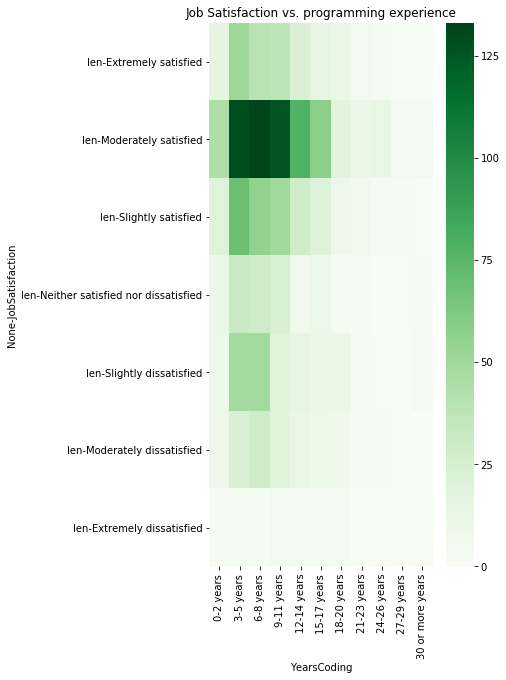

In [0]:
plt.figure(figsize=(5, 10))
ax = plt.axes()
sns.heatmap(dfPol_Sat1.T, cmap = 'Greens', ax =ax)
ax.set_title("Job Satisfaction vs. programming experience")

*Dane dla świata - Stopień zadowolenia programistów w zależności od czasu pracy jako programista *

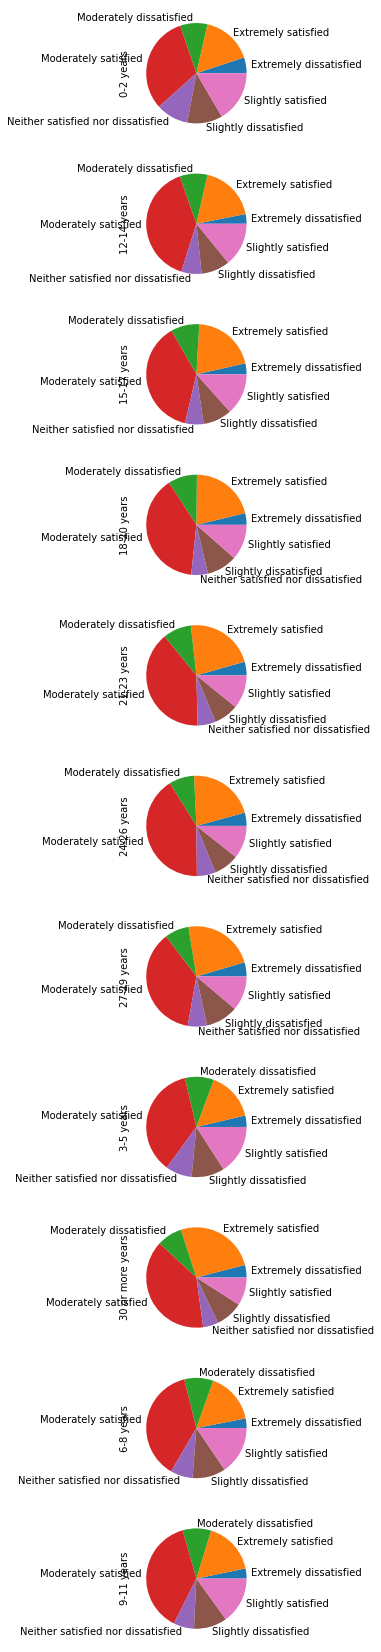

In [0]:
df_Sat = pd.pivot_table(df[['JobSatisfaction', 'YearsCoding']], index = ['YearsCoding'], columns = ['JobSatisfaction'], aggfunc = len, fill_value = 0)
df_Sat.sort_values(by = df_Sat.columns.values[1], ascending = False)
fig, axes = plt.subplots(nrows = 11)
fig.set_figheight(30)
fig.set_figwidth(4)
for i in range(len(df['YearsCoding'].unique())-1):
    df_Sat.iloc[i].plot(kind="pie", ax = axes[i])

*Najszczęśliwsi programiści w poszczególnych krajach*

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



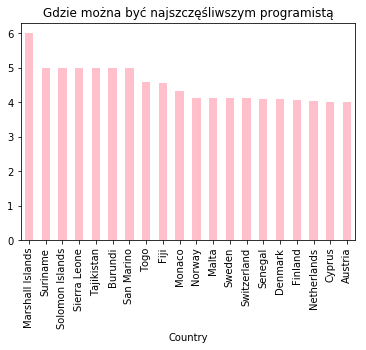

In [0]:
SatMap = {'Extremely dissatisfied' : 0,
             'Extremely satisfied' : 6,
             'Moderately dissatisfied' : 1,
             'Moderately satisfied'  : 5,
             'Neither satisfied nor dissatisfied' : 3,
              'Slightly satisfied' : 4 ,
              'Slightly dissatisfied' : 2,
         np.nan : 3}
df['JobSatisfactionNumber'] = df['JobSatisfaction'].map(SatMap)
df_Sat_Country = df.groupby('Country')['JobSatisfactionNumber'].mean()
df_Sat_Country.sort_values(ascending=False).head(20).plot(kind = 'bar', colors = ['Pink'], title = 'Gdzie można być najszczęśliwszym programistą')

*Największą satysfakcję programiści odczuwają po kilku latach pracy. Z danych wynika, że 3 lata pracy jako programista pozwalają oczuć satysfakcję z wykonywanej pracy.  Dane są porównywalne dla Polski oraz dla pozostałych krajów. Jednak w miarę wydłużania się czasu pracy jako programista satysfakcja powoli maleje. Z danych wynika również, że największe zadowolenie z pracy jako programista odczuwają mieszkańcy San Marino, czy Wysp Salomona albo Togo. Czyli należy zacząć pracę jako programista, przepracować kilkanaście lat, a zarobki wtedy osiągane pozwolą na zdalną pracę - np. na gorących wyspach.*



## 7.   Zestawienie obecnie używanych języków programowania, baz danych, platform i frameworków z najlepiej rokującymi w kolejnych latach technologiami




### Języki programowania

In [0]:
lang = dfPoland['LanguageWorkedWith'].str.split(';', expand = True)
lang = lang.stack().reset_index()
lang = lang[[0]]
lang = lang[0].value_counts().sort_index()
#langS = lang.reset_index()
#langS.head(10)

langDes = dfPoland['LanguageDesireNextYear'].str.split(';', expand = True)
langDes = langDes.stack().reset_index()
langDes = langDes[[0]]
langDes = langDes[0].value_counts().sort_index()
lang = pd.DataFrame(lang)
langDes = pd.DataFrame(langDes)
lang['Desired'] = langDes[0]
lang.columns = ['WorkedWith', 'Desired']
lang.sort_values(by = 'WorkedWith', ascending = False).head(10)

,WorkedWith,Desired
JavaScript,1052,748
HTML,960,609
CSS,919,570
SQL,853,554
Java,688,488
Bash/Shell,649,427
Python,599,626
C#,587,475
C++,460,310
PHP,406,200


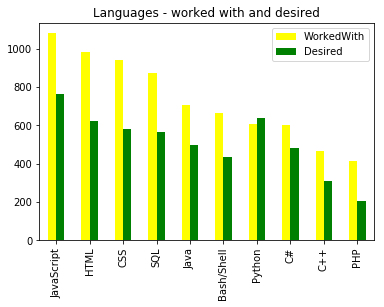

In [0]:
lang.sort_values(by = 'WorkedWith', ascending = False).head(10).plot(kind = 'bar', color = ['yellow', 'green'], title = 'Languages - worked with and desired')

### Bazy danych


In [0]:
dataBaze = dfPoland['DatabaseWorkedWith'].str.split(';', expand = True)
dataBaze = dataBaze.stack().reset_index()
dataBaze = dataBaze[[0]]
dataBaze = dataBaze[0].value_counts().sort_index()
#dataBazeS = dataBaze.reset_index()
#dataBazeS.head(10)
dataBazeDes = dfPoland['DatabaseDesireNextYear'].str.split(';', expand = True)
dataBazeDes = dataBazeDes.stack().reset_index()
dataBazeDes = dataBazeDes[[0]]
dataBazeDes = dataBazeDes[0].value_counts().sort_index()
dataBaze = pd.DataFrame(dataBaze)
dataBazeDes = pd.DataFrame(dataBazeDes)
dataBaze['Desired'] = dataBazeDes[0]
dataBaze.columns = ['WorkedWith', 'Desired']
dataBaze.sort_values(by = 'WorkedWith', ascending = False).head(10)

,WorkedWith,Desired
MySQL,680,362
PostgreSQL,618,527
SQL Server,500,315
MongoDB,337,389
Redis,273,322
SQLite,257,134
Elasticsearch,242,314
MariaDB,168,124
Oracle,128,78
"Microsoft Azure (Tables, CosmosDB, SQL, etc)",103,154


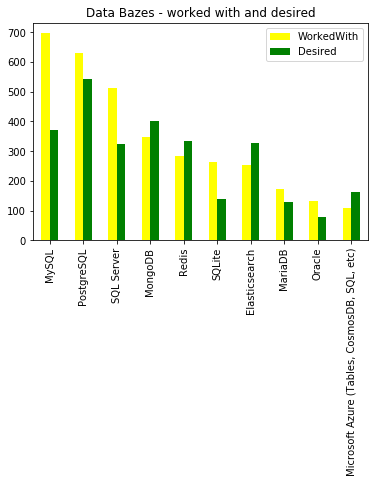

In [0]:
dataBaze.sort_values(by = 'WorkedWith', ascending = False).head(10).plot(kind = 'bar', color = ['yellow', 'green'], title = 'Data Bazes - worked with and desired')

### Platformy

In [0]:
platform = dfPoland['PlatformWorkedWith'].str.split(';', expand = True)
platform = platform.stack().reset_index()
platform = platform[[0]]
platform = platform[0].value_counts().sort_index()
platformDes = dfPoland['PlatformDesireNextYear'].str.split(';', expand = True)
platformDes = platformDes.stack().reset_index()
platformDes = platformDes[[0]]
platformDes = platformDes[0].value_counts().sort_index()
platform = pd.DataFrame(platform)
platformDes = pd.DataFrame(platformDes)
platform['Desired'] = platformDes[0]
platform.columns = ['WorkedWith', 'Desired']
platform.sort_values(by = 'WorkedWith', ascending = False).head(10)

,WorkedWith,Desired
Linux,736,688
Windows Desktop or Server,525,382
Android,359,399
AWS,261,335
Raspberry Pi,212,303
WordPress,199,79
Mac OS,176,197
Azure,164,211
Firebase,151,166
Arduino,141,172


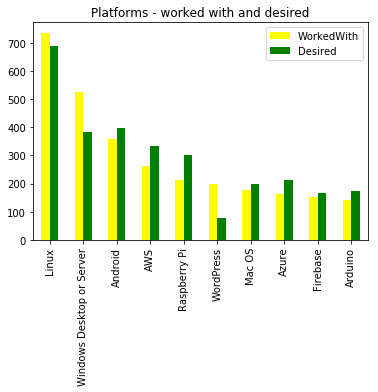

In [0]:
platform.sort_values(by = 'WorkedWith', ascending = False).head(10).plot(kind = 'bar', color = ['yellow', 'green'], title = 'Platforms - worked with and desired')

### Frameworki

In [0]:
framework = dfPoland['FrameworkWorkedWith'].str.split(';', expand = True)
framework = framework.stack().reset_index()
framework = framework[[0]]
framework = framework[0].value_counts().sort_index()
frameworkDes = dfPoland['FrameworkDesireNextYear'].str.split(';', expand = True)
frameworkDes = frameworkDes.stack().reset_index()
frameworkDes = frameworkDes[[0]]
frameworkDes = frameworkDes[0].value_counts().sort_index()
framework = pd.DataFrame(framework)
frameworkDes = pd.DataFrame(frameworkDes)
framework['Desired'] = frameworkDes[0]
framework.columns = ['WorkedWith', 'Desired']
framework.sort_values(by = 'WorkedWith', ascending = False)

,WorkedWith,Desired
Angular,431,379
Node.js,418,444
Spring,287,264
.NET Core,283,355
React,281,481
Django,169,183
Xamarin,86,125
TensorFlow,81,272
Spark,66,120
Cordova,62,33


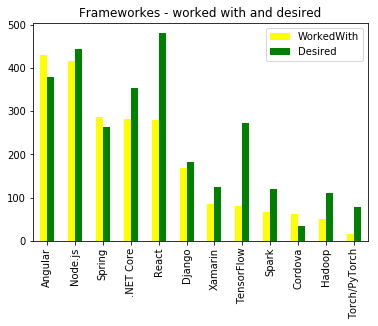

In [0]:
framework.sort_values(by = 'WorkedWith', ascending = False).plot(kind = 'bar', color = ['yellow', 'green'], title = 'Frameworkes - worked with and desired')

### Preferencje wobec systemów operacyjnych

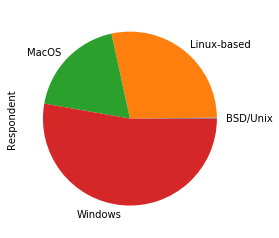

In [0]:
df_OS = dfPoland.groupby(['OperatingSystem'])['Respondent'].count()
df_OS.plot(kind="pie")

*Polscy programiści, którzy wzięli udział w badaniu w większości pracują w językach front-end: JS, HTML czy CSS. Java czy Python są kolejne na liście. Trend powoli się zmienia, co widać w skoku jaki dokonał Python w zestawieniu języków preferowanych w kolejnym roku. Z miejsca 7 wśród języków, z którymi pracują programiści, przesuwa się na 2 wśród pożądanych, zaraz za Java Script. Zaraz za nim jest C#, który również awansuje w spektakularny sposób. 
W przypadku systemów zarządzania relacyjnymi bazami danych, największą popularnością cieszą się bazy oparte na SQL: MySQL, PostgreeSQL i SQLServer. Programiści przyszłość widzą również w MongoDB, które jest na drugim miejscu wśród pożądanych systemów (skok z 4). Widać również zainteresowanie innymi bazami jak ElasticSearch czy Redis.
W przypadku platform, bezkonkurencyjny jest Linux. Za nim plasuje się Windows Detskop czy Android. Z danych wynika, że programiści interesują sie również Raspberry Pi czy AWS, gdzie dane świadczą o większym zainteresowaniu w kolejnych latach. 
W przypadku frameworków, największą popularnością obecnie cieszy się Angular, Node.js oraz Spring. Zaskakującą zmianę widać w przypadku Reacta, który programiści uważają za najbardziej pożądany w kolejnym roku. Zaraz zanim jest Node.js, a dopiero potem Angular. Największą zmiana dotyczy jednak TensorFlow, gdzie widać znaczącą różnicę między ilością osób obecnie go używających, a tymi, którzy planują się z nim zapoznać.
Dane potwierdzają, że w Polsce dominującym systemem operacyjnym jest Windows. Kolejny udział w rynku mają systemy bazujące na Linuksie.*


## 8.   Co wpływa na podjęcie decyzji o zmianie pracy - czym można przekonać potencjalnego pracownika (assessjob, benefits)



In [0]:
assesJob = dfPoland[['AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 
                                    'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'Gender']]
assesJob.columns = ['Industry', 'FinancialPeform', 'SpecyficDepartm', 'LanguagesFramework',
       'CompensationBenefits', 'CompanyCulture', 'RemoteWork', 'ProfessionalDev',
       'CompanyDiv', 'ProductService', 'Gender']
assesJob = pd.pivot_table(assesJob, index = ['Gender'], aggfunc = np.mean, fill_value = np.mean)
assesJobGender = assesJob.iloc[[0, 2]].T.sort_values(by = 'Female', ascending = False)
assesJobGender

Gender                       Female      Male
mean CompanyDiv            7.585714  8.466397
     FinancialPeform       7.257143  6.218623
     Industry              7.028571  6.554656
     ProductService        6.700000  6.322267
     SpecyficDepartm       6.142857  6.127126
     RemoteWork            5.142857  5.383806
     CompensationBenefits  4.728571  4.285830
     CompanyCulture        4.328571  4.877733
     LanguagesFramework    3.457143  3.336842
     ProfessionalDev       2.628571  3.426721

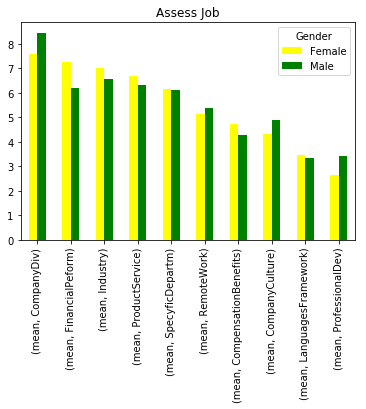

In [0]:
assesJobGender.plot(kind = 'bar', color = ['yellow', 'green'], title = 'Assess Job')

*Z danych wynika, że największe znaczenie dla programistów w Polsce przy wyborze miejsca pracy mają różnorodność działalności firmy , jej  wyniki finansowe czy rodzaj branży, w której działa. Pomiędzy kobietami a mężczyznami różnice nie są znaczące, jeśli chodzi o ocenę firm pod kątem przyszłej pracy. Większe różnice pomiędzy podejściem kobiet i mężczyzn pojawiły się przy finansowych wynikach firmy (bardziej istotnych dla kobiet) oraz przy możliwościach rozwoju osobistego, które dla męzczyzn są ważniejsze. Z danych wynika, że kobiety można do przedsiębiorstwa przyciągnąć poprzez przedstawienie przyszłego miejsca pracy jako zróżnicowanego, z podkreśleniem jego wyników finansowych, branży w której działa oraz świadczonych usług. W przypadku mężczyzn bardziej istotna jest prezentacja firmy jako przedsiębiorstwa z dobrymi wynikami finansowymi, działającego w określonej branży, świadczącego określone usługi. Istotna jest również dla nich specyfika departamentu, w którym mają pracować.*

In [0]:
assessBenefits = dfPoland[['AssessBenefits1',
       'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'Gender']]
assessBenefits.columns = ['Salary', 'StockOption', 'HealthInsurance', 'ParentalLeave',
       'Gym', 'Retirements', 'MealsSnacks', 'Computer',
       'ChildCare', 'Transportation', 'EducationBudget', 'Gender']
assessBenefits = pd.pivot_table(assessBenefits, index = ['Gender'], aggfunc = np.mean, fill_value = np.mean)
assessBenefitsGender = assessBenefits.iloc[[0, 2]].T.sort_values(by = 'Female', ascending = False)
assessBenefitsGender

Gender                  Female      Male
mean ChildCare        8.085714  7.886885
     StockOption      7.985714  6.499180
     Transportation   7.785714  7.561475
     ParentalLeave    7.371429  7.604098
     MealsSnacks      6.885714  6.636885
     Gym              6.714286  6.691803
     Retirements      6.500000  7.231148
     Computer         5.057143  5.170492
     EducationBudget  4.700000  4.836066
     HealthInsurance  3.314286  4.151639
     Salary           1.600000  1.730328

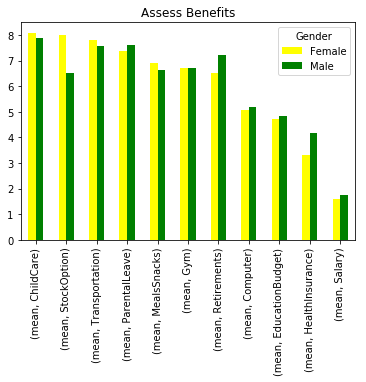

In [0]:
assessBenefitsGender.plot(kind = 'bar',  color = ['yellow', 'green'], title = 'Assess Benefits')

*W przypadku kobiet największe znaczenie przy wyborze miejsca pracy mają dodatkowe benefity dotyczące ułatwień w opiece nad dziećmi, w tym urlopów rodzicielskich, dostępnych środków transportu czy udziałów w przedsiębiorstwie. Dla mężczyzn najistotniejsze są oferowane profity związane również  z opieką dla dzieci, czy środkami transportu, ale też dotyczące przyszłej emerytury. Istotnym czynnikiem dla mężczyzn jest dostęp do obiektów sportowych, który dla kobiet plasuje się dalej na liście. Największe różnice w ocenie dodatkowych benefitów dotyczą udziałów w przedsiębiorstwie  (bardziej znaczące dla kobiet) oraz przyszłej emerytury i opieki zdrowotnej (bardziej istotnych dla mężczyzn).*